# # <center>Machine Learning e DS com Python de A a Z</center>

Tipo de Variáveis</br>
Numéricas & Categóricas</br>
Numéricas => Contínuas e Discretas</br>
Categóricas => Nominal e Ordinal

### Primeira Base de Dados

#### Importação das Bibliotecas Padrões (básicas)

In [1]:
%pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns ## Biblioteca para visualização de gráficos
import matplotlib.pyplot as plt
import plotly.express as px ## Biblioteca para gráfico dinâmico

#### Exploração dos Dados

In [3]:
dados_credito = pd.read_csv('credit_data.csv')
dados_credito.head(3)

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0

In [4]:
## Visualização de Estatíticas pré-escritas pelos pandas
dados_credito.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [5]:
## Aplicando filtros
dados_credito[dados_credito['income'] > 69995]

clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [6]:
dados_credito[dados_credito['loan'] < 1.377630]

clientid        income        age     loan  default
865       866  28072.604355  54.142548  1.37763        0

#### Visualização dos Dados

In [7]:
np.unique(dados_credito['default'], return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

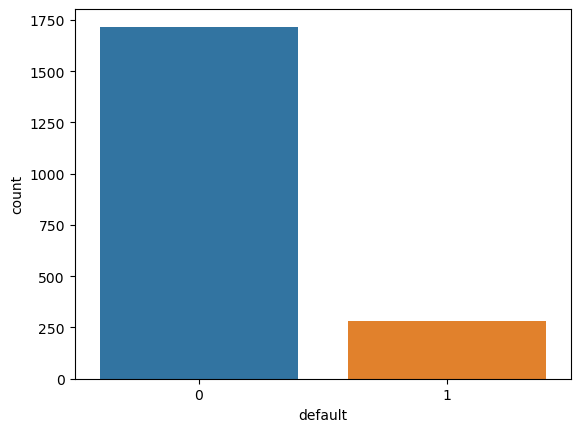

In [8]:
sns.countplot(x = dados_credito['default']);

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

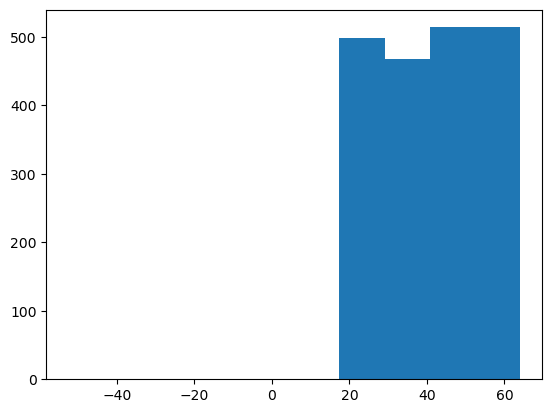

In [9]:
plt.hist(x = dados_credito['age'])

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

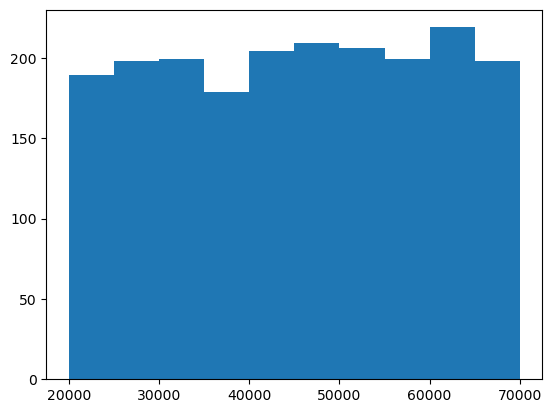

In [10]:
plt.hist(x = dados_credito['income'])

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

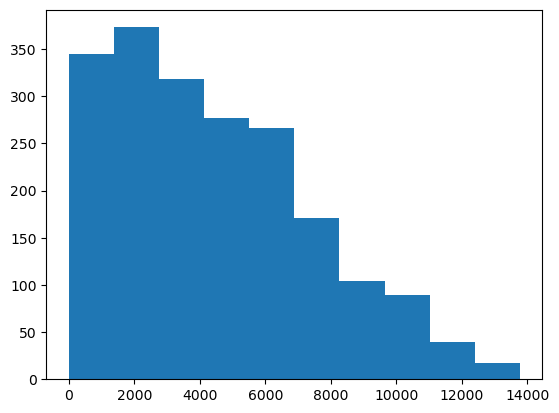

In [11]:
plt.hist(x = dados_credito['loan'])

In [12]:
## Grafico Dinamico do Matplotlib.pyplot
graficoDinamico = px.scatter_matrix(dados_credito, dimensions=['age', 'income', 'loan'], color='default')
## Scatter (grafico de dispersão)
graficoDinamico

#### Corrigindo Base de Dados - Tratando dados inconsistentes

In [13]:
dadosInconsistentes = dados_credito[dados_credito['age'] < 0]
dadosInconsistentes

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [14]:
## Outra maneira de localização os valores inconsistentes é usar o comando LOC
dadosInconsistentes = dados_credito.loc[dados_credito['age'] < 0]
dadosInconsistentes

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

Técnicas para tratar essas dados inconsistenes são:</br>
1. Apagar os valores inconsistenes (ou pela coluna inteira ou pela linhas);</br>
baseDados.drop('nomeColuna', axis=0/1[se é coluna ou linha])
baseDados.drop(baseDados[baseDados['nomeColuna'] filtro (<, =, > etc)].index)
2. Preencher os valores inconsistentes manualmente (por ligação, contato com o clientes, etc);</br>
3. Preencher os valores inconsistentes pela média, moda, mediana (TMC)</br>
 => pela média {</br>
    baseDados.mean()</br>
 }</br>
 => pela mediana{</br>
   baseDados.median()</br>
 }</br>
 => pela moda{</br>
   baseDadis['nomeColuna'].value_counts().index[0] //index[0] retornar o valor que mais se repete, necessário saber se existe alguma valor que tem destaque</br>
 }

In [15]:
## Extraindo a mediana dos valores que possuem idades maiores que 0, não absorvendo os valores menores que ZERO.
mediana = dados_credito['age'][dados_credito['age'] > 0].median()
mediana

41.3826734491158

In [16]:
dados_credito.loc[dados_credito['age'] < 0, 'age'] = mediana
dados_credito.head(26)

clientid        income        age         loan  default
0          1  66155.925095  59.017015  8106.532131        0
1          2  34415.153966  48.117153  6564.745018        0
2          3  57317.170063  63.108049  8020.953296        0
3          4  42709.534201  45.751972  6103.642260        0
4          5  66952.688845  18.584336  8770.099235        1
5          6  24904.064140  57.471607    15.498598        0
6          7  48430.359613  26.809132  5722.581981        0
7          8  24500.141984  32.897548  2971.003310        1
8          9  40654.892537  55.496853  4755.825280        0
9         10  25075.872771  39.776378  1409.230371        0
10        11  64131.415372  25.679575  4351.028971        0
11        12  59436.847123  60.471936  9254.244538        0
12        13  61050.346079  26.355044  5893.264659        0
13        14  27267.995458  61.576776  4759.787581        0
14        15  63061.960174  39.201553  1850.369377        0
15        16  50501.726689  41.382673  3977.287432        0
16        17  43548.654711  39.574530  3935.544453        0
17        18  43378.175194  60.848318  3277.737553        0
18        19  20542.365073  61.690571  3157.442290        0
19        20  58887.357549  26.076093  4965.516066        0
20        21  23000.784002  31.761354  1148.118057        0
21        22  32197.620701  41.382673  4244.057136        0
22        23  23329.319414  48.576975   222.622299        0
23        24  27845.800894  51.970624  4959.921226        0
24        25  65301.984029  48.840922  5465.267886        0
25        26  47451.630123  27.031741  5361.282716        0

##### Refazendo os gráficos iniciais

(array([202., 207., 196., 209., 167., 213., 202., 217., 196., 188.]),
 array([18.05518851, 22.64684924, 27.23850998, 31.83017071, 36.42183144,
        41.01349218, 45.60515291, 50.19681364, 54.78847438, 59.38013511,
        63.97179584]),
 <BarContainer object of 10 artists>)

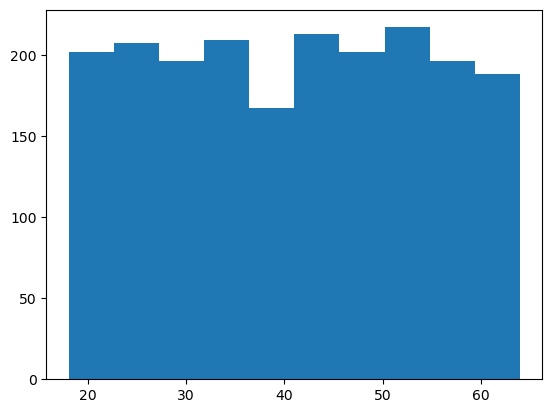

In [17]:
# Histograma das idades
plt.hist(x= dados_credito['age'])

In [18]:
## Grafico Dinamico
graficoDinamicoCorrigido = px.scatter_matrix(dados_credito, dimensions=['age','income', 'loan'], color='default')
graficoDinamicoCorrigido

#### Tratando dados faltantes

In [19]:
dados_credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [20]:
## Extraindo os endereços dos dados que são nulos
Vazios = dados_credito[dados_credito['age'].isnull()]
    ## Poderia fazer da seguinte forma
        ## dados_credito.loc[pd.isnull(dados_credito['age'])]
Vazios
## index[28, 30, 31]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [21]:
dados_credito.loc[dados_credito['age'].isnull(), 'age'] = mediana

In [22]:
dados_credito.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [23]:
dados_credito.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.929065   4444.369695     0.141500
std     577.494589  14326.327119    13.251893   3045.410024     0.348624
min       1.000000  20014.489470    18.055189      1.377630     0.000000
25%     500.750000  32796.459717    29.102161   1939.708847     0.000000
50%    1000.500000  45789.117313    41.382673   3974.719419     0.000000
75%    1500.250000  57791.281668    52.582340   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

Outra forma de corrigir dados ausentes</br>
baseDados['colunaAModificar'].fillna(baseDados['age'].median(), inplace='True')

In [24]:
dados_credito.loc[dados_credito['clientid'].isin([29, 31, 32])]

clientid        income        age         loan  default
28        29  59417.805406  41.382673  2082.625938        0
30        31  48528.852796  41.382673  6155.784670        0
31        32  23526.302555  41.382673  2862.010139        0

#### Divisão entre previsores e classe

In [25]:
## Etapa para separação da Base de Dados para escrever o modelo de previsão do pagamento ou não dos empréstimos.
    ## Nesse caso, teremos duas variáveis existentes oriundas do DataSet (previsores e a classe)
        ## Nesse caso, o 'income', 'age' e 'loan' serão variáveis previsores, pois irão armazernar as características que apontarão para o pagamento.
            ## Para as previsoras o nome dado será X.
        ## E a Série 'default' que é a classe, recebedora da previsão.
            ## Para as classes o nome dado será Y
## Função iloc, tem como objetivo quais linhas e colunas. .iloc[linhas, colunas]
## O ID não entra na formulação do modelo, assim como Nome (caso tivesse), pois isso não dá informações para decisão. Pois são atributos únicos.


In [26]:
dados_credito.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [27]:
## Variável Previsora
x_dados = dados_credito.iloc[:, 1:4].values
x_dados

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [28]:
type(x_dados)

numpy.ndarray

In [29]:
## Variável de Classe
y_dados = dados_credito.iloc[:, 4].values
y_dados

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
type(y_dados)

numpy.ndarray

#### Escalonamento dos valores

O Escalonamento é a forma de todos os atributos estarem na mesma dimensão númerica, para que o modelo possa funcionar. <br/> Assim o algoritmo não prioriza alguma coluna.

In [31]:
## Como é uma lista das linhas dos itens, podemos selecionar por coluna.
x_dados[:, 0]

array([66155.92509508, 34415.15396582, 57317.17006303, ...,
       44311.44926231, 43756.05660491, 69436.57955155])

In [32]:
## Podemos extrair as maiores e menores dados.
## Essa verificação é para terminar as variações dos dados e provar a necessidade do escalonamento
    ## Extraindo dados menores
x_dados[:, 0].min(), x_dados[:, 1].min(), x_dados[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [33]:
    ## Extraindo dados maiores
x_dados[:, 0].max(), x_dados[:, 1].max(), x_dados[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

Para escalonar os dados (tornar a mesma escala padrão para todos) podemos usar  escalonamento por: </br>.por Padronização (indicada quando possuímos outliers) e; </br>.por Normalização 

Python já possui bibliotecas para fazer a conversão desse escalonamento.

##### Novas importações de Bibliotecas

In [34]:
## Importar o scikit Learning - Biblioteca padrão para algoritmos de Aprendizado de Máquinas
from sklearn.preprocessing import StandardScaler
    ## Preprocessing é um pacote da biblioteca Scikit Learning
        ## A StandardScaler é uma função, a qual é responsãvel por escalonar os dados, fará o preprocesso.

In [35]:
## Criando uma variável para armazenar a função
scaler_credito = StandardScaler()

## Convertendo os dados para mesma escala
x_dados = scaler_credito.fit_transform(x_dados)

In [36]:
## Verificando o escalonamento
x_dados[:, 0].min(), x_dados[:, 1].min(), x_dados[:, 2].min()

(-1.7676158019964077, -1.7265153934356259, -1.4592791099462408)

In [37]:
## Verificando o escalonamento
x_dados[:, 0].max(), x_dados[:, 1].max(), x_dados[:, 2].max()

(1.7220222385319197, 1.7392604286705533, 3.0616609141708273)

In [38]:
## Conhecendo totalmente o DataFrame escalonado
x_dados

array([[ 1.45393393,  1.36527462,  1.20281942],
       [-0.76217555,  0.54255534,  0.69642695],
       [ 0.83682073,  1.67406504,  1.17471147],
       ...,
       [-0.07122592, -0.97458737,  0.35420081],
       [-0.11000289,  1.73926043, -0.92675625],
       [ 1.682986  ,  1.14907046,  0.96381038]])

### Segunda Base de Dados

#### Exploração do Dados

In [39]:
dados_censos = pd.read_csv('census.csv')
dados_censos.head(3)

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   

        marital-status          occupation    relationship    race    sex  \
0        Never-married        Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse     Exec-managerial         Husband   White   Male   
2             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K

In [40]:
dados_censos.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [41]:
dados_censos.count('columns').value_counts()

15    32561
dtype: int64

In [42]:
dados_censos.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

#### Visualização dos Dados

In [43]:
### Verificando a quantidade das informações na coluna INCOME
np.unique(dados_censos['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [44]:
## Outra maneira de determinar a quantidade:
### Verificando a quantidade das informações na coluna INCOME
dados_censos['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

<AxesSubplot:xlabel='count', ylabel='income'>

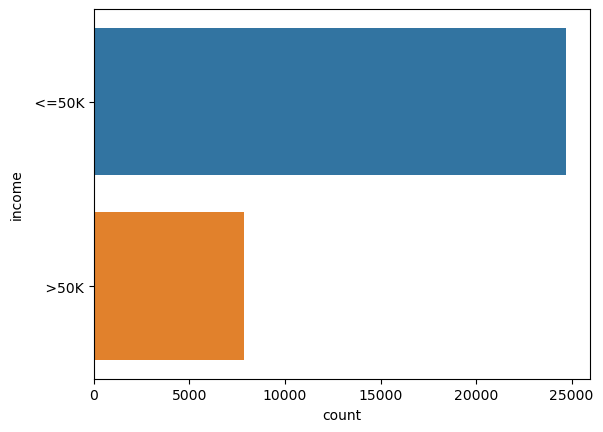

In [45]:
## Visualizando os dados da renda.
    ## Objetivo determinar se as características das previsores determinará quanto uma pessoa vai ganhar ou não
sns.countplot(y = dados_censos['income'])

A classe INCOME pode ser considerada, série de dados desbalançeada. Pois para um atributo tem muito mais valores que para o(s) outro(s).

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

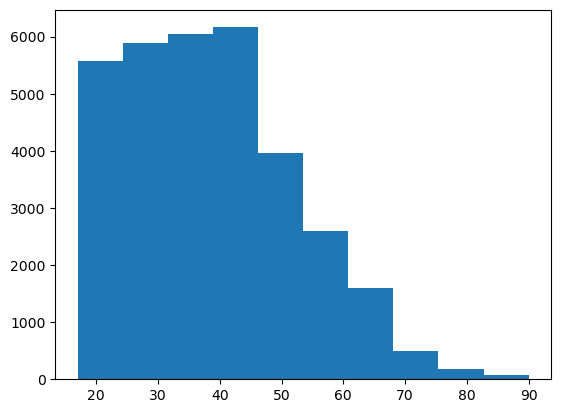

In [46]:
## Criando um histograma para varredura da distribuição dos valores
    ## de Idade
plt.hist(x=dados_censos['age'])

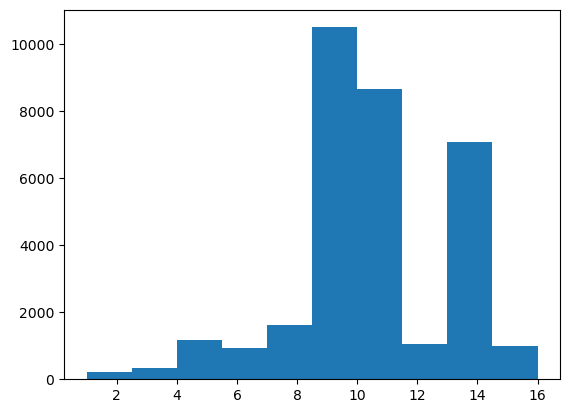

In [47]:
## Criando um histograma para varredura da distribuição dos valores
    ## de Formação
plt.hist(x=dados_censos['education-num']);

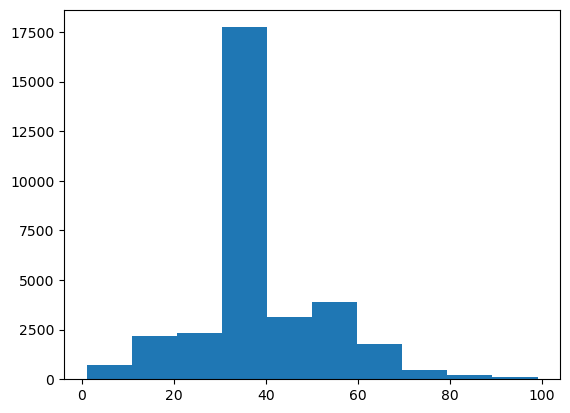

In [48]:
## Criando um histograma para varredura da distribuição dos valores
    ## de Hora/Semana
plt.hist(dados_censos['hour-per-week']);

In [49]:
## Criando um grafico dinamico, baseado na ocorrencia
    ## da classe de trabalho
graficoDinamicoCensus = px.treemap(dados_censos, path=['workclass', 'occupation', 'income']);
graficoDinamicoCensus

In [50]:
## Criando um grafico dinamico, baseado nas relacões
    ## entre as colunas
graficoParaleloCensus = px.parallel_categories(dados_censos, dimensions=['occupation', 'relationship'])
graficoParaleloCensus

In [51]:
## Criando um grafico dinamico, baseado nas relacões
    ## entre as colunas
graficoParaleloCensus = px.parallel_categories(dados_censos, dimensions=['workclass','occupation', 'income'])
graficoParaleloCensus

#### Divisão entre previsores e classe

In [52]:
dados_censos.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [53]:
x_census = dados_censos.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [54]:
type(x_census)

numpy.ndarray

In [55]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [56]:
y_census = dados_censos.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

#### Tratamento de atributos categóricos

Quando tivermos no conjunto de dados, séries do tipo texto (categórico), ou alfanúmericos, precisaremos transformá-los para valores númericos, para o treino do modelo, após isso devolver para sua forma original.

##### LabelEnconder

In [57]:
## Biblioteca Para Tratar os dados Categóricos
from sklearn.preprocessing import LabelEncoder

##### Criando um teste para o LabelEncoder


In [58]:
objeto = LabelEncoder()
teste = objeto.fit_transform(x_census[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [59]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

##### Tratando atributos categóricos

In [60]:
dados_censos.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [61]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

Necessário criar um objeto de cada série categórica que recebe a instância da biblioteca LabelEnconder()

In [62]:
## Os objetos a serem criados precisam ser somente das séries que são categóricos
Encoder = LabelEncoder()

In [63]:
## Necessário chamar a série e modificá-la para alterar o dataset
x_census[:, 1] = Encoder.fit_transform(x_census[:, 1])
x_census[:, 3] = Encoder.fit_transform(x_census[:, 3])
x_census[:, 5] = Encoder.fit_transform(x_census[:, 5])
x_census[:, 6] = Encoder.fit_transform(x_census[:, 6])
x_census[:, 7] = Encoder.fit_transform(x_census[:, 7])
x_census[:, 8] = Encoder.fit_transform(x_census[:, 8])
x_census[:, 9] = Encoder.fit_transform(x_census[:, 9])
x_census[:, 13] = Encoder.fit_transform(x_census[:, 13])

In [64]:
## Chamando o dataSet - usando uma linhas apenas para visualização;
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [65]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

##### OneHotEncoder

Ao tratar os dados com o LabelEncoder, a biblioteca irá classificar as categórias por valor númerico (de 1 até a contagem distinta da série) o que pode levar os algoritmos de Aprendizado de Máquinas a priorizar os que possuem numeração maior.
Para evitar isso, o OneHotEncoder, quebra cada série em microsséries por tipo do valor.

Exemplo:</br>Uma coluna chamada Carro, que tem os valores Gol, Uno, Palio, se quebrará em 3 colunas, ou microsséries chamadas Gol, Uno, Palio

In [78]:
## Teste de Entendimento
    ## Verificando os tipos e a quantidade de dados por uma série específica
        ## Tipos da série
print(np.unique(dados_censos['workclass']))
        ## Quantidade dos tipos diferentes
print(len(np.unique(dados_censos['workclass'])))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
9


In [82]:
## Testando as colunas e seus  valores
print('A base as seguintes tipos de valor: ', np.unique(dados_censos['occupation']))
print('A quantidade da base é: ', len(np.unique(dados_censos['occupation'])))

A base as seguintes tipos de valor:  [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
A quantidade da base é:  15


In [83]:
## Biblioteca Para enquadrar os dados por tipo e modelos de informações
from sklearn.preprocessing import OneHotEncoder
## Bibliotexa para transformar as séries em colunas
from sklearn.compose import ColumnTransformer

#### Escalonamento dos valores